## Importing libraries

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import math


In [53]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# NLP

<img src = "https://www.encora.com/hs-fs/hubfs/Blog-EncoraML.png?width=800&name=Blog-EncoraML.png"/>

NLP (Natural Languate Processing) is a subset of Artificial Intelligence (sometimes it is also refered to as a branch of computer science) that deals with the teaching the machines to understand and generate languages spoken by the humans. NLP helps extract important information from unstructured texts. Instead of a tool like machine learning or deep learning, NLP should be considered as a problem that can be solved by using ML and DL tools. Solving NLP problems require some specific data pre-processing:

<img src = 'https://miro.medium.com/max/1024/1*pzjECYWP8WOWhwfCjebZVw.png'/>

- **Normalize**: Remove punctuations, lowercase all words. We do this because we want a uniform representation of words everytime. For instance if we search for the word 'jenna', it should also return 'Jenna' or even 'JENNA'.
- **Tokenize**: It is considered the first step of NLP. During this step, the whole sentence is chopped into smaller units: usually a list of words.
- **Remove Stop Words**: Stop words are those words that occur very frequently in the language. These words are filtered out as they do not give valuable information and are redundant.
- **Stemming/Lemmatization**: Sometimes a word can occur in many forms. Such as went and go gives the same meaning. In NLP, such words that give same meanings are reduced to a same word. Stemming uses the root word for the given root, while lemmatization uses the context in which the word was used in order to reduce the word. 

<a href = 'https://neptune.ai/blog/vectorization-techniques-in-nlp-guide'>source</a>
# Vectorization
Vectorization refers to the classical method of conversion of the the texts to numerical vectors that the computers understand. Basically, it's a feature extraction from texts to machine readable formats. The outputs of the vectorization is then fed to the Machine Learning or Deep Learning algorithms. There are many types of vectorization:

## 1. Bag of Words vectorization:
<img src = 'https://miro.medium.com/max/1400/1*3IACMnNpwVlCl8kSTJocPA.png'/>

This is perhaps the most simple method of vectorization. We construct a sparse matrix of sentences (or documents) and the words that occur in those sentences and count the frequency of those words. As the number of vocabulary increases, the matrrix becomes larger.

## 2. TF-IDF Vectorization
The bag of model that we saw above gives more weight to the words that occur frequently. As a result, less important words that occur frequently get more importance; such as articles, prepositions, etc. To avoid this, TD-IDF implements an algorithms that help overcome this.

### TF


\begin{align}
TF = \frac{Frequency\, of\, the\, word\, in\, the\, document}{Total\, number\, of\, words\, in\, that\, document} 
\end{align}

### IDF

\begin{align}
DF = \frac{Document\, containing\, the\, word\,  W}{Total\, number \,of\, documents}\\\\
\end{align}

\begin{align}
IDF = \log{(\frac{Total\, number \,of\, documents}{Document\, containing\, the\, word\,  W})}
\end{align}



### TF-IDF

\begin{align}
TF-IDF = TF * IDF
\end{align}

**Term frequency** can be defined as the ratio of frequency of a particular word to the total number of words in that document. It can be thought of as a normalized score.

**Document Frequency** gives us the proportion of the documents that containt that particular word.

**Inverse Document Frequency** is the log of inverse of the document frequency. As total number of documents containing a word increases, it becomes less important. We take the log of this value (because the Inverse document frequencey alone could be a very large number as there might be hundred thousand of documents and very few documents containing the word).

We multipy the TF and the IDF terms in order to get the final results.


## 3. Word2Vec

Word2Vec is a novel approach developed by Google in 2013. In the previous two approaches, we saw that the words were represented by a single entity (meaning if we had 100 words in the vocabulary, we needed a vector of 100 elements. Imagine hundred of thousands of words.)

The main idea behind word2vec is to create a word embedding where the similar words are grouped together.

## Implementation

We download the necessary word corpus.

In [37]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/siddhi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/siddhi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/siddhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/siddhi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
df_fake = pd.read_csv('resources/datasets/Fake.csv')
df_true = pd.read_csv('resources/datasets/True.csv')

In [57]:
df_fake.shape, df_true.shape

((23481, 4), (21417, 4))

In [100]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [59]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


We need to add target labels to each dataset 1 for true and 0 for false, then we concat the dataset.

In [81]:
df_true['text'] = df_true['text'].str.replace(
    ".*Reuters..-.",
    "", 
    regex=True
)

In [83]:
def concat_dataset(df_true, df_false):
    df_true = df_true.drop(columns=["title", "subject", "date"])
    df_false = df_false.drop(columns=["title", "subject", "date"])
    
    df_true['label'] = 1
    df_false['label'] = 0
    df = pd.concat([df_true,df_false])
    return df

In [84]:
df = concat_dataset(df_true, df_fake)

In [85]:
X = df["text"]
y = df["label"]
print(X.shape, y.shape)

(44898,) (44898,)


In [86]:
stop_words = set(stopwords.words('english')) 
def lammetize_func(x):
    """
        remove stop words, lowercase and lammetize
    """
    lemmatizer = WordNetLemmatizer()
    return ' '.join(
        [
            lemmatizer.lemmatize(x.lower()) 
            for x in word_tokenize(x) 
            if x.lower() not in stop_words]
    )

In [87]:
X = [lammetize_func(x) for x in df['text']]

In [88]:
X = pd.DataFrame(X)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=7
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35918, 1), (8980, 1), (35918,), (8980,))

In [90]:
# create the transform
vectorizer = TfidfVectorizer()
# transforming
tfidf_train = vectorizer.fit_transform(
    x_train.iloc[:,0]
)
tfidf_test = vectorizer.transform(
    x_test.iloc[:,0]
)

In [91]:
tfidf_train.shape, tfidf_test.shape

((35918, 105770), (8980, 105770))

In [92]:
pac = RandomForestClassifier(random_state = 7, )
pac.fit(tfidf_train, y_train.values.ravel())

#Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 98.84%


In [93]:
x_test[0][5096]

'u.s. president donald trump ’ move revise travel ban citizen certain muslim-majority country lessen impact tourism , head un world tourism organization said . “ people ’ go place ’ feel welcome , ” taleb rifai , secretary general tourism organization , told reuters , world ’ biggest travel trade fair , itb berlin , open wednesday . trump monday signed revised executive order banning citizen six muslim-majority nation traveling united state removing iraq list , controversial first attempt blocked court . “ ’ detail country included , ’ attitude , ” rifai said tuesday . last week , told reuters united state lost $ 185 million one month first ban introduced stood lose ten million month similar policy continued . data travel analysis company forwardkeys week showed demand travel united state coming month already flattened following positive start year . downturn demand travel united state expected impact travel general . international tourist number expected grow 3 4 percent year last yea

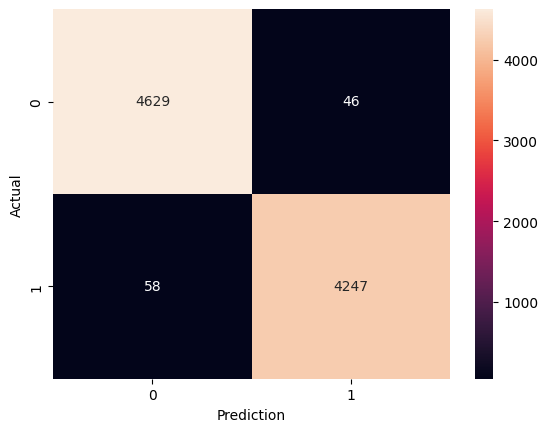

In [94]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d")
ax.set(xlabel='Prediction', ylabel='Actual')
plt.show()

In [131]:
def predictor(news, vectorizer):
    lnews = lammetize_func(news)

    df = pd.DataFrame([lnews])

    x = df.iloc[:,0]
    x = vectorizer.transform(x)

    x_pred = pac.predict(x)

    return 'Not Fake' if x_pred[0] == 1 else 'Fake' 

In [134]:
predictor("""'berlin ( reuters ) - u.s. president donald trump ’ move revise travel ban citizen certain muslim-majority country lessen impact tourism , head un world tourism organization said . “ people ’ go place ’ feel welcome , ” taleb rifai , secretary general tourism organization , told reuters , world ’ biggest travel trade fair , itb berlin , open wednesday . trump monday signed revised executive order banning citizen six muslim-majority nation traveling united state removing iraq list , controversial first attempt blocked court . “ ’ detail country included , ’ attitude , ” rifai said tuesday . last week , told reuters united state lost $ 185 million one month first ban introduced stood lose ten million month similar policy continued . data travel analysis company forwardkeys week showed demand travel united state coming month already flattened following positive start year . downturn demand travel united state expected impact travel general . international tourist number expected grow 3 4 percent year last year ’ 1.24 billion , rifai said tuesday . “ world opened incredible way . many option . want gamble , ’ go la vega , go macau instead , ” said . market researcher euromonitor cut forecast u.s. arrival 2020 84.2 million 85.2 million amid uncertainty travel ban . caroline bremner , head travel research euromonitor , said seven country included original travel ban represented 0.1 percent total inbound traveler . “ impact volume going much message u.s. sending business leisure traveler around world , level international openness type welcome receive new government , ” said .'""", vectorizer)

'Not Fake'